In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [15]:
# --- 1. Data Loading ---
print("--- Step 1: Loading Data ---")
try:
    df = pd.read_csv('/content/ecommerce_furniture_dataset_2024.csv')
    print("/content/ecommerce_furniture_dataset_2024.csv")
except FileNotFoundError:
    print("Error: The file 'ecommerce_furniture_dataset_2024.csv' was not found.")
    print("Please ensure the file is in the same directory as this script.")
    exit()

--- Step 1: Loading Data ---
/content/ecommerce_furniture_dataset_2024.csv


# **Data Preprocessing & Cleaning**

In [17]:

print("--- Step 2: Data Preprocessing ---")
# Remove '$' and ',' from price columns and convert them to float
df['price'] = df['price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
df['originalPrice'] = df['originalPrice'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
print("Price columns cleaned and converted to numeric format.\n")

--- Step 2: Data Preprocessing ---
Price columns cleaned and converted to numeric format.



# **Exploratory Data Analysis (EDA)**

--- Step 3: Exploratory Data Analysis (EDA) ---


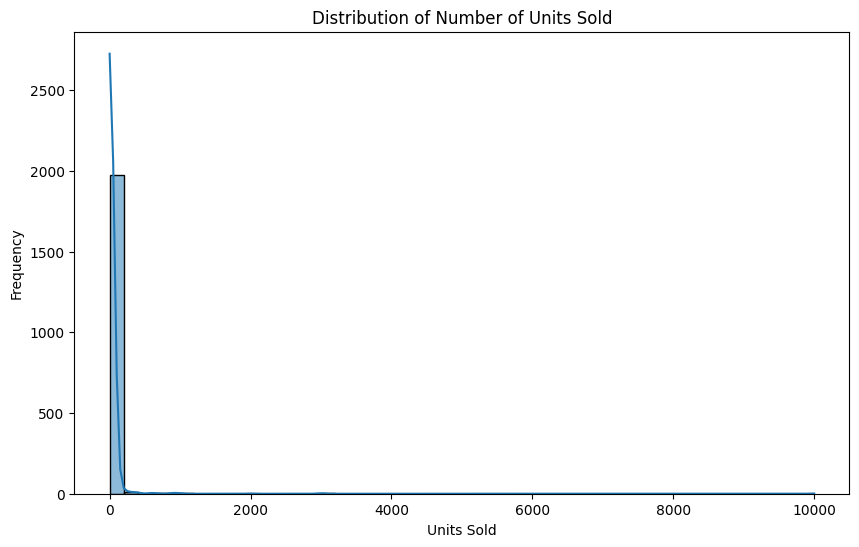

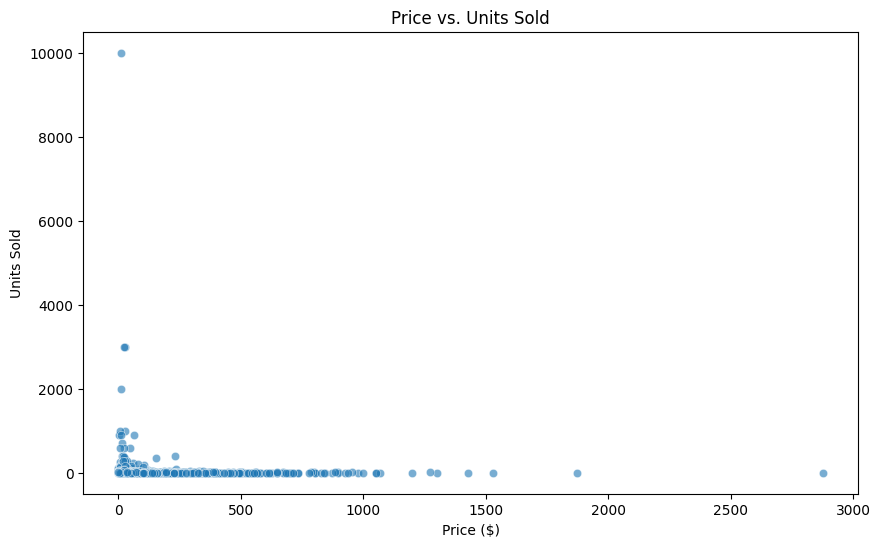

Key distributions and relationships visualized.



In [18]:
print("--- Step 3: Exploratory Data Analysis (EDA) ---")
# Plot the distribution of the 'sold' column
plt.figure(figsize=(10, 6))
sns.histplot(df['sold'], bins=50, kde=True)
plt.title('Distribution of Number of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()

# Plot the relationship between 'price' and 'sold'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='sold', data=df, alpha=0.6)
plt.title('Price vs. Units Sold')
plt.xlabel('Price ($)')
plt.ylabel('Units Sold')
plt.show()
print("Key distributions and relationships visualized.\n")

# **Feature Engineering**

In [19]:
print("--- Step 4: Feature Engineering ---")
# Create a new feature: discount percentage
df['discount_percentage'] = ((df['originalPrice'] - df['price']) / df['originalPrice']) * 100
df['discount_percentage'].replace([float('inf'), float('-inf')], np.nan, inplace=True)
df['discount_percentage'].fillna(0, inplace=True)
print("New feature 'discount_percentage' created.\n")

--- Step 4: Feature Engineering ---
New feature 'discount_percentage' created.



/tmp/ipython-input-51601401.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['discount_percentage'].replace([float('inf'), float('-inf')], np.nan, inplace=True)
/tmp/ipython-input-51601401.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

# **Model Selection & Training**

In [20]:
print("--- Step 5: Model Selection & Training ---")
# Drop rows with any missing values in the relevant columns for modeling
df.dropna(subset=['price', 'sold', 'discount_percentage'], inplace=True)

# Define features (X) and target (y)
X = df[['price', 'discount_percentage']]
y = df['sold']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_:.2f}\n")

--- Step 5: Model Selection & Training ---
Linear Regression model trained successfully.
Model Coefficients: [-0.06281693  1.47739533]
Model Intercept: 17.94



# **Model Evaluation**

--- Step 6: Model Evaluation ---
Mean Squared Error (MSE): 5421.97
Root Mean Squared Error (RMSE): 73.63
R-squared (R2) Score: 0.01



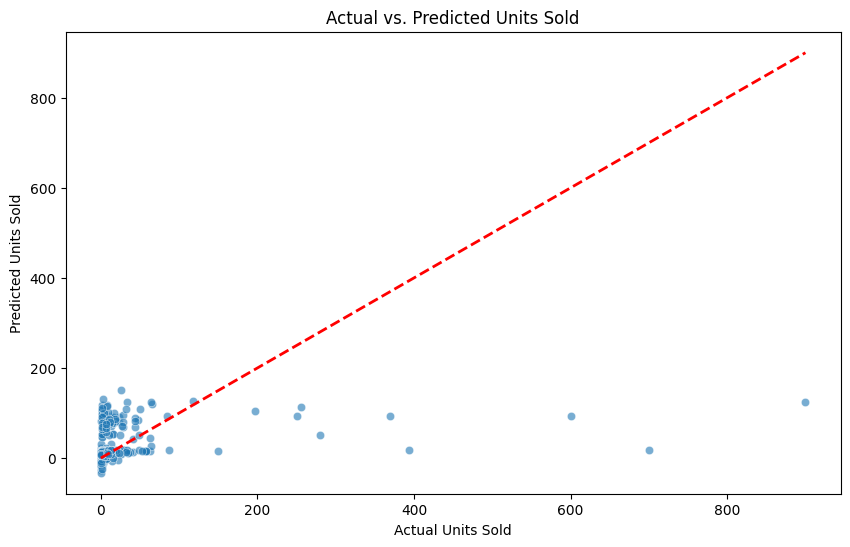

--- Project Concluded ---


In [21]:
print("--- Step 6: Model Evaluation ---")
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}\n")

# Visualize predicted vs actual values to evaluate performance
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Units Sold')
plt.xlabel('Actual Units Sold')
plt.ylabel('Predicted Units Sold')
plt.show()

print("--- Project Concluded ---")